# ECE 2200 - Chapter 2 notebook
Copyright (C) 2022 Daniel Van Blerkom

In [1]:
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


## Important Constants

Boltzmann constant $k=1.38x10^{-23}$ J/K <br>
Electron charge $q=1.6x10^{-19}$ C <br>
Dielectric constant of vacuum $\epsilon_{0}=8.85x10^{-14}$ $F/cm^2$

Silicon Characteristics

Silicon energy bandgap $E_g=1.12$ eV <br>
Electron mobility in silicon $\mu_n=1350$ $cm^2/(V*s)$ <br>
Hole mobility in silicon $\mu_p=480$ $cm^2/(V*s)$ <br>
Dielectric constant in silicon $\epsilon_{Si}=11.7 \epsilon_{0}$ $F/cm^2$

In [2]:
q = 1.6E-19 #C, or J/eV
k = 1.38E-23 #J/K
eps_0 = 8.85E-14 #F/cm

Eg = 1.12*q #in J
mu_n = 1350 #cm^2/(V s)
mu_p = 480 #cm^2/(V s)

eps_si = 11.7*eps_0 #F/cm

### First, let's look at the electron carrier concentration in undoped Silicon:

Intrinsic carrier concentration in Silicon

$n_i=5.2x10^{15}T^{3/2}exp({\frac{-E_g}{2kT}}) $

In [3]:
def n_i(Temp): return 5.2E15*math.pow(Temp,(3/2))*math.exp(-Eg/(2*k*Temp))

#### Plot the carrier concentration from 250K to 350K (i.e. -23C to 77C)

In [15]:
Temps = np.arange(200.0,300.0,10.0)
niplot = np.zeros_like(Temps)
for i,Temp in enumerate(Temps):
    niplot[i] = n_i(Temp)

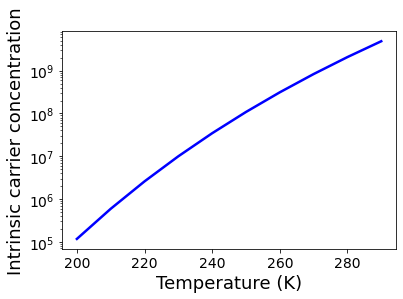

In [16]:
plt.figure()
plt.plot(Temps, niplot, color='b', linewidth=2.5)
plt.xlabel('Temperature (K)', fontsize=18)
plt.ylabel('Intrinsic carrier concentration', fontsize=18)

ax = plt.gca()

ax.set_yscale('log')

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(14)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(14)


Notice the intrinsic carrier concentration varies by orders of magnitude over 100C.

### Using the mobility, we can determine the resistivity of Silicon with different free charge carrier levels

The current density for Silicon with a free electron density of $n$, under an electric field of $E$, is:

$J_n=\mu_n E \cdot{} n \cdot{} q$

Remember that $R = \frac{V}{I}$, $E = \frac{V}{L}$, and $J = \frac{I}{\sigma}$, where $\sigma$ is the cross-sectional area.

Resistivity $\rho$ is resistance times area divided by length, giving $\rho = \frac{R \cdot{} \sigma}{L} = \frac{V \cdot{} \sigma}{I \cdot{} L} $.

Substituting, we can write $\rho = \frac{E}{J_n} = \frac{1}{\mu_n \cdot{} n \cdot{} q}$


Accounting for the holes as well as the electrons:

$J=\mu_n E \cdot{} n \cdot{} q + \mu_p E \cdot{} p \cdot{} q$

Note that the current densities add - because the oppositely charged carriers move in opposite directions under the electric field; i.e. they both contribute to the total net current.  This is different than what happens with diffusion, as we will see later.

Using both holes and electron free carrier density, we can write $\rho = \frac{1}{\mu_n \cdot{} n \cdot{} q + \mu_p \cdot{} p \cdot{} q}$

However, in most doped situations either the electron or hole density will dominate the resistivity.

In [6]:
def rho_n(n): return 1/(mu_n*n*q)
def rho_p(p): return 1/(mu_p*p*q)
def rho(n,p): return 1/(mu_p*p*q + mu_n*n*q)


What's the resistivity of intrinsic silicon?  Remember $np = n_i^2$, so for intrinsic silicon $n = p = n_i$

In [7]:
rho(n_i(300),n_i(300))

316932.8613622433

It's high - pure silicon is not a good conductor at room temperature (hence the "semi-")

### Now let's look at the built-in potential

Built-in potential

$V_0=\frac{kT}{q} ln(\frac{N_A N_D}{n_i^2})$

In [8]:
def V_0(Na,Nd,Temp): return (k*Temp/q)*math.log(Na*Nd/math.pow(n_i(Temp),2))

#### Plot the change in the built-in potential with across doping levels (keep Na at 2x10^16)

In [9]:
Nds = np.arange(14.0,18.0,0.1)
Nds = 10**Nds
v0plot = np.zeros_like(Nds)
for i,Nd in enumerate(Nds):
    v0plot[i] = V_0(2E16,Nd,300)

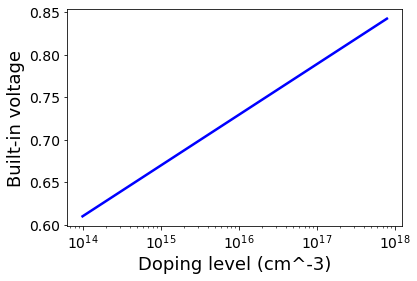

In [10]:
plt.figure()
plt.plot(Nds, v0plot, color='b', linewidth=2.5)
plt.xlabel('Doping level (cm^-3)', fontsize=18)
plt.ylabel('Built-in voltage', fontsize=18)

ax = plt.gca()
ax.set_xscale('log')

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(14)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(14)


In [11]:
V_0(2E16,2E16,300) - V_0(2E17,2E16,300)


-0.05957938928122086

In [12]:
def Cj_0(Na,Nd,Temp): return math.sqrt(eps_si*q*Na*Nd/(2*(Na+Nd)*V_0(Na,Nd,Temp)))

def Cj(Vr,Na,Nd,Temp): return Cj_0(Na,Nd,Temp)/math.sqrt(1.0-(Vr/V_0(Na,Nd,Temp)))

In [13]:
Cj_0(2E16,9E15,300)

2.6606681855240156e-08

In [14]:
Cj(-1.0,2E16,9E15,300)

1.7257961194583908e-08